In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import shutil

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [6]:
# Define the paths to the audio files
paths = [
    "DATASET/bonafide",
    "DATASET/spoof"
]

# Combine file paths
file_list = []
for path in paths:
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith(".flac"):
                file_list.append({"File Path": os.path.join(root, file), "File Name": file})

audio_df = pd.DataFrame(file_list)
print(f"Total number of audio files: {len(audio_df)}")
audio_df.head()

Total number of audio files: 20000


,File Path,File Name
0,DATASET/bonafide\df_e_2000503.flac,df_e_2000503.flac
1,DATASET/bonafide\df_e_2000531.flac,df_e_2000531.flac
2,DATASET/bonafide\df_e_2001149.flac,df_e_2001149.flac
3,DATASET/bonafide\df_e_2001230.flac,df_e_2001230.flac
4,DATASET/bonafide\df_e_2002152.flac,df_e_2002152.flac


In [7]:
# Save the combined data (optional)
audio_df.to_csv("asv-metadata.csv", index=False)

In [ ]:
# Display metadata
metadata = pd.read_csv("asv-metadata.csv")
print(f"Total records in metadata: {len(metadata)}")
print(metadata.head())

Total records in metadata: 27376
                      File Path            File Name Speaker ID     Label
0   bonafide\record-1020001.wav   record-1020001.wav     record  bonafide
1  bonafide\record-10200010.wav  record-10200010.wav     record  bonafide
2  bonafide\record-10200011.wav  record-10200011.wav     record  bonafide
3  bonafide\record-10200012.wav  record-10200012.wav     record  bonafide
4  bonafide\record-10200013.wav  record-10200013.wav     record  bonafide


In [12]:
# Count the occurrences of each label in the merged DataFrame
label_counts = metadata['Label'].value_counts()

# Display the counts of each label
print("Count of each label in the merged data:")
print(label_counts)

# Optionally, display the counts in a more readable format
for label, count in label_counts.items():
    print(f"{label}: {count}")

Count of each label in the merged data:
Label
spoof       14499
bonafide    12877
Name: count, dtype: int64
spoof: 14499
bonafide: 12877


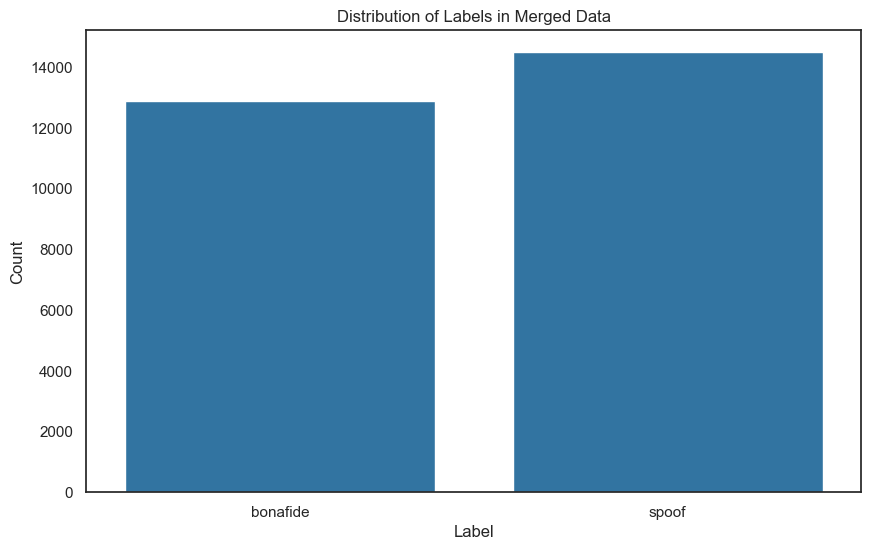

In [13]:
# Plot the distribution of labels to visualize the counts of each class
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata, x='Label')
plt.title('Distribution of Labels in Merged Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()